In [4]:
import numpy as np
import matplotlib.pyplot as plt

from detectron2.data import MetadataCatalog
from detectron2.modeling import build_model
from detectron2.data.detection_utils import read_image
from detectron2.utils.visualizer import ColorMode, Visualizer
# from detectron2.engine import DefaultPredictor

from zsis.config import get_cfg
from zsis.engine import DefaultPredictor
from zsis.modeling import GeneralizedRCNNWithText

In [7]:
cfg = get_cfg()
cfg.merge_from_file('../../config/rcnn_clip/modified_resnet')

cfg.MODEL.DEVICE = 'cpu'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2
cfg.MODEL.META_ARCHITECTURE = "GeneralizedRCNN"
# cfg.MODEL.WEIGHTS = '/root/krishneel/ros/data/logs/zsis_no_test/model_0019999.pth'

In [8]:
predictor = DefaultPredictor(cfg)

In [9]:
predictor.model

GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): Backbone(
      (model): Base(
        (model): ModifiedResNet(
          (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1

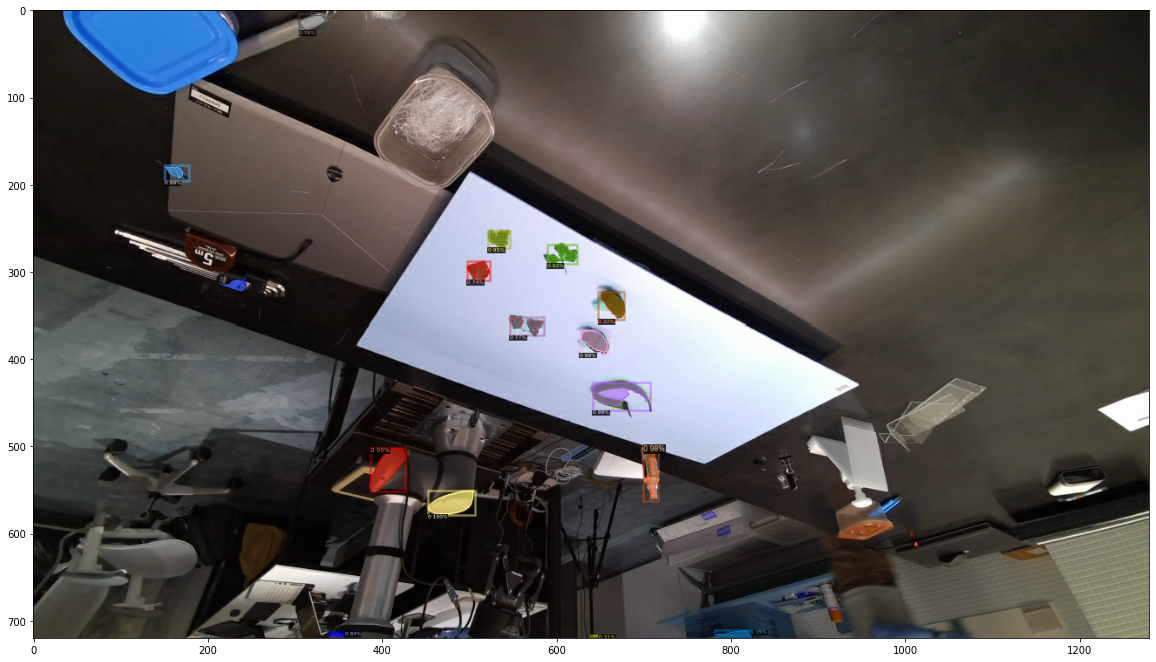

In [52]:
im_path = '/root/krishneel/ros/data/2022-07-28-17-48-24/image/000001.jpg'
image = read_image(im_path, 'BGR')
predictions = predictor(image)

metadata = MetadataCatalog.get(cfg.DATASETS.TEST[0] if len(cfg.DATASETS.TEST) else "__unused")
# metadata.thing_classes = labels
visualizer = Visualizer(image, metadata, instance_mode=ColorMode.IMAGE)

instances = predictions["instances"].to('cpu')
# top_probs, top_labels = predictions['top_probs'][:, 0].cpu(), predictions['top_labels'][:, 0].cpu()
# instances.set('pred_classes', top_labels)
# instances.set('scores', top_probs)

# print(predictions['top_probs'])
vis_output = visualizer.draw_instance_predictions(predictions=instances)

plt.rcParams['figure.figsize'] = [20, 16]
plt.imshow(vis_output.get_image())